Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow import keras

In [3]:
df=pd.read_csv("Churn_Modelling.csv")

In [4]:
df.shape

(10000, 14)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.isna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.drop(["CustomerId","RowNumber","Surname"],axis="columns",inplace=True)

In [8]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [11]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

Descriptive Statistics

In [12]:
fails=0
wins=0
for i in range(len(df)):
  if df.loc[i, "Exited"] == 1:
    fails=fails+1
  else:
    wins=wins+1
values=[wins,fails]

print(values)

[7963, 2037]


([<matplotlib.patches.Wedge at 0x7bd7ef539480>,
 [Text(-0.8823431426537007, 0.6568642010431011, 'Retained'),
  Text(0.8823431426537006, -0.6568642010431012, 'Exited')],
 [Text(-0.48127807781110943, 0.3582895642053278, '79.6%'),
  Text(0.4812780778111093, -0.35828956420532787, '20.4%')])

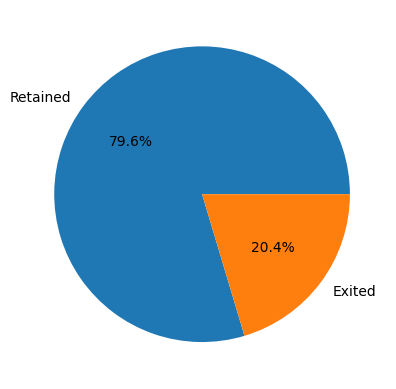

In [13]:
categories=["Retained","Exited"]
plt.pie(values, labels=categories,autopct='%1.1f%%')


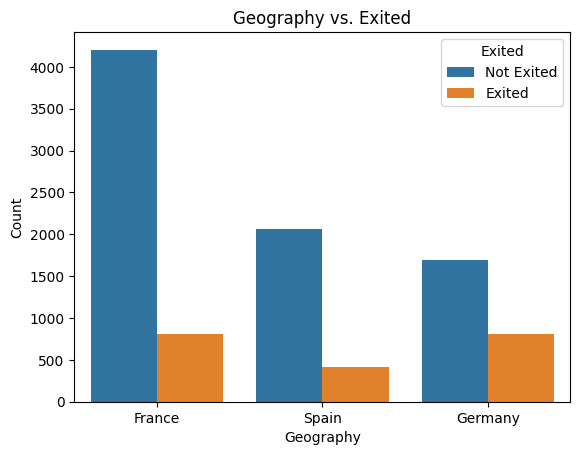

In [14]:
sns.countplot(x="Geography", hue="Exited", data=df)
plt.title("Geography vs. Exited")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.legend(title="Exited", labels=["Not Exited", "Exited"])

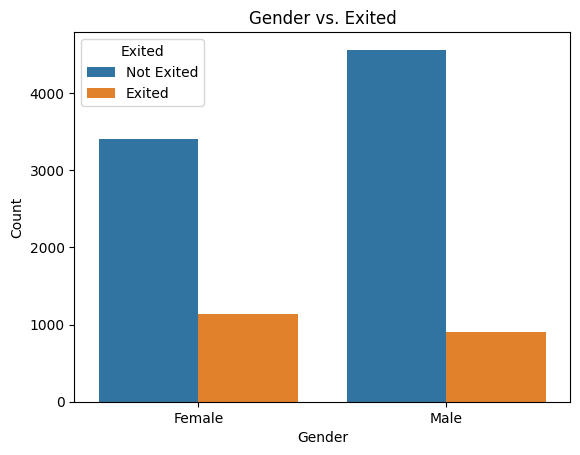

In [15]:
sns.countplot(x="Gender", hue="Exited", data=df)
plt.title("Gender vs. Exited")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Exited", labels=["Not Exited", "Exited"])

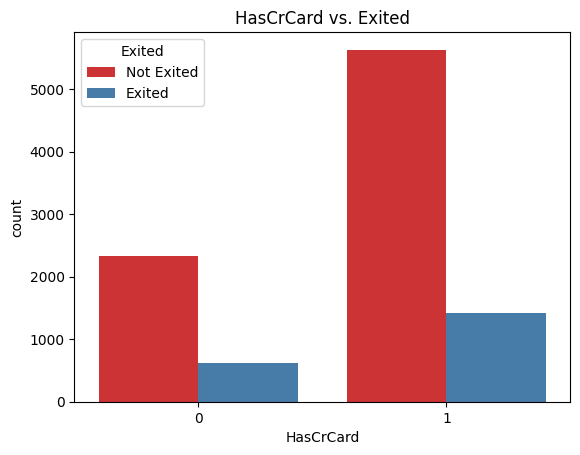

In [16]:
sns.countplot(x="HasCrCard", hue="Exited", data=df, hue_order=[0, 1], palette="Set1")
plt.title("HasCrCard vs. Exited")
plt.legend(title="Exited", labels=["Not Exited", "Exited"])

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Variables')

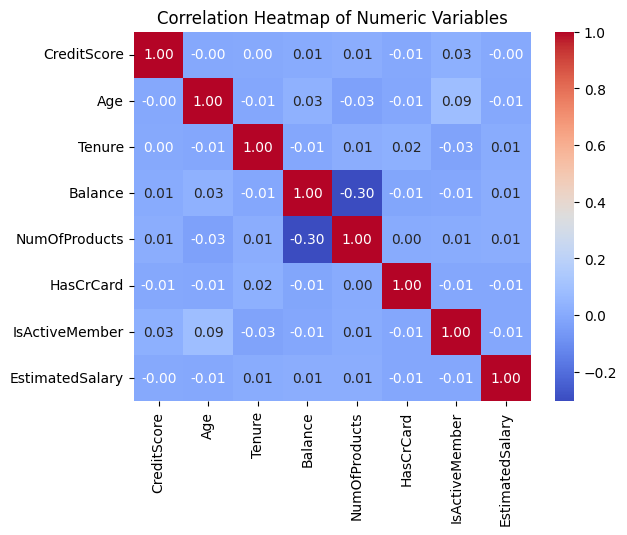

In [17]:
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                   'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")

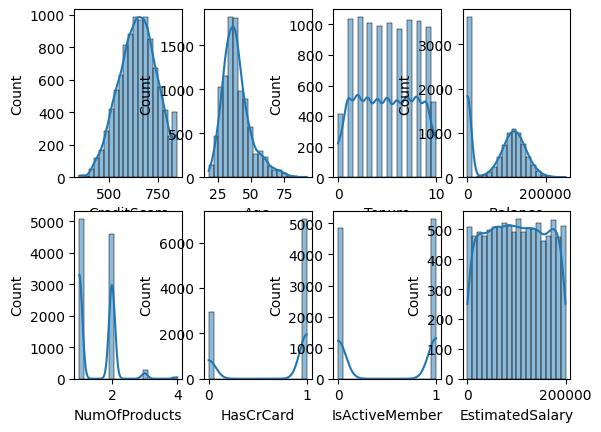

In [18]:
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[column], bins=20, kde=True)

Text(0.5, 1.0, 'Box Plot of Numeric Variables')

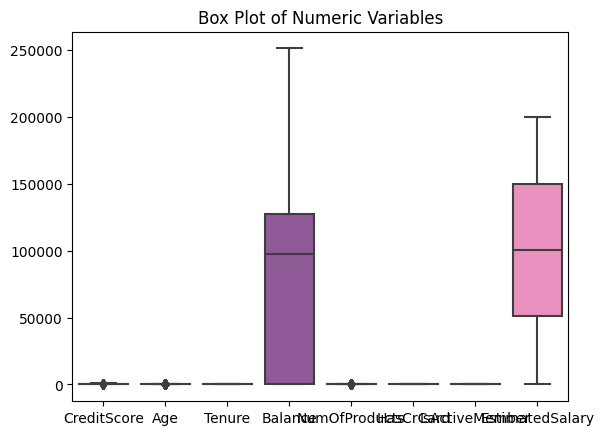

In [19]:
sns.boxplot(data=df[numeric_columns], orient="v", palette="Set1")
plt.title("Box Plot of Numeric Variables")

In [20]:
df["BalanceSalaryRatio"]=df.Balance/df.EstimatedSalary
df["TenureByAge"]=df.Tenure/df.Age

In [21]:
df["Gender"].replace({"Male":0,"Female":1},inplace=True)

In [22]:
df["Gender"]

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Gender, Length: 10000, dtype: int64

In [23]:
df1=pd.get_dummies(data=df,columns=["Geography"])

In [24]:
cont_var=["Tenure","CreditScore","Age","Balance","NumOfProducts","EstimatedSalary"]
df1[cont_var]=MinMaxScaler().fit_transform(df1[cont_var])

In [25]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge
0,619,France,1,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476
3,699,France,1,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512


In [26]:
x=df1.drop("Exited",axis='columns')

In [27]:
y=df1["Exited"]

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

ANN

In [40]:
model =keras.Sequential([keras.layers.Dense(12,input_shape=(None,32,14),activation ='relu'),
                         keras.layers.Dense(6,activation ='relu'),
                         keras.layers.Dense(1,activation ='softmax')
                                            ])


model.compile(loss = 'binary_crossentropy', optimizer = 'Adam',metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, None, 32, 12)      180       
                                                                 
 dense_16 (Dense)            (None, None, 32, 6)       78        
                                                                 
 dense_17 (Dense)            (None, None, 32, 1)       7         
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(x_train,y_train,epochs=500)

Epoch 1/500
250/250 [==============================] - 1s 2ms/step - loss: 0.6776 - accuracy: 0.7496
Epoch 2/500
250/250 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.7981
Epoch 3/500
250/250 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7985
Epoch 4/500
250/250 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.8061
Epoch 5/500
250/250 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8130
Epoch 6/500
250/250 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8158
Epoch 7/500
250/250 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8183
Epoch 8/500
250/250 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8152
Epoch 9/500
250/250 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8229
Epoch 10/500
250/250 [==============================] - 0s 2ms/step - loss: 0.4384 - accura

In [42]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8505


[0.36390188336372375, 0.8504999876022339]

In [43]:
yp=model.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [44]:
print(yp)

[[0.4983191 ]
 [0.5655402 ]
 [0.60851014]
 ...
 [0.09895673]
 [0.23571797]
 [0.8966192 ]]


In [45]:
y_pred=[]
for i in yp:
  if i>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [46]:
print(y_pred)

[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 